# Visualizing results

In [6]:
import pushers
from pushers import *

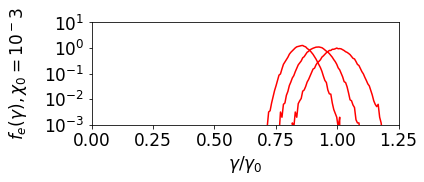

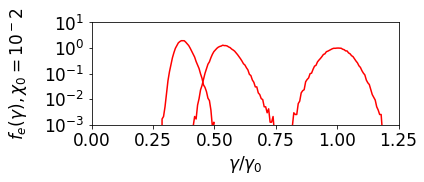

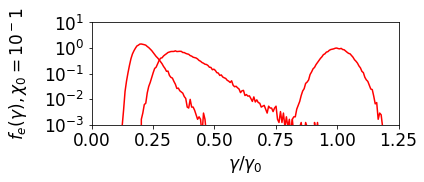

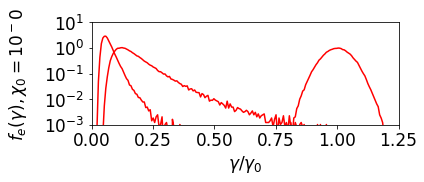

In [13]:
for i in ["-3","-2","-1","-0"]:
    # load
    infile = open('chi0_{}_FP'.format(i),'rb')
    chi0, tmax, tdim, Nsmpl, gmdist_dump1, gmdist_dump2, gmdist_dump3 = pickle.load(infile)
    infile.close()

    # get histograms
    nbins = 200

    # dump 1
    gmdist_y,gmdist_x = np.histogram(gmdist_dump1,np.linspace(1,1800+4*90,nbins))
    gmdist1_y, gmdist1_x = gmdist_y, np.array(arraycenter(gmdist_x))

    # dump 2
    gmdist_y,gmdist_x = np.histogram(gmdist_dump2,np.linspace(1,1800+4*90,nbins))
    gmdist2_y, gmdist2_x = gmdist_y, np.array(arraycenter(gmdist_x))

    # dump 3
    gmdist_y,gmdist_x = np.histogram(gmdist_dump3,np.linspace(1,1800+4*90,nbins))
    gmdist3_y, gmdist3_x = gmdist_y, np.array(arraycenter(gmdist_x))

    # plot
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
    
    plt.plot(gmdist1_x/1800,gmdist1_y/np.max(gmdist1_y),'-r')
    plt.plot(gmdist2_x/1800,gmdist2_y/np.max(gmdist1_y),'-r')
    plt.plot(gmdist3_x/1800,gmdist3_y/np.max(gmdist1_y),'-r')
    plt.xlim([0,1.25])
    plt.ylim(np.array([1e-3,1e1]))
    plt.yscale('log')

    fntsz=17
    axes.set_xlabel(r'$\gamma/\gamma_0$',fontsize=fntsz)
    axes.set_ylabel(r'$f_e(\gamma),\chi_0=10^{}$'.format(i),labelpad=15,fontsize=fntsz)
    axes.set_xticks([0,0.25,0.5,0.75,1,1.25])
    axes.set_yticks([1e-3,1e-2,1e-1,1e0,1e1])
    axes.tick_params(axis="x", labelsize=fntsz)
    axes.tick_params(axis="y", labelsize=fntsz)
    # aspect
    xmin, xmax = axes.get_xlim()
    ymin, ymax = axes.get_ylim()
    axesratio = (np.log10(ymax)-np.log10(ymin))/(xmax-xmin)
    axes.set_aspect(aspect=1/3/axesratio)
    
    # final
    plt.tight_layout()
    #plt.savefig('chi0_{}_FP.pdf'.format(i))
    plt.show()